<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/Foot-classifier/Foot_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2 as cv

from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k

from tensorflow import keras

from tqdm.notebook import tqdm
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.utils import load_img

In [ ]:
!unzip 'foot datasets - Copy.zip' -d my_data

In [17]:
dataset = []

In [19]:
dir_path = '/content/my_data/foot datasets - Copy'
dir_contents = os.listdir(dir_path)
for png_image in dir_contents:
    if png_image.lower().endswith('.png'):
        image_path = os.path.join(dir_path, png_image)
        image = cv.imread(image_path)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        image = Image.fromarray(image)
        image = image.resize((64, 64))
        dataset.append(np.array(image))

In [23]:
label = [1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0
         ,1,1,1,1,1,1,1,1,0,1,1,
         1,1,1,1,1,1,1,0,1,1,0,1,1,
         0,1,1,0,1,1,1,1,1,1,1,1,1,1,
         1,0,1,1,0,1,1,1,0,0,1,1,0,1,
         1,1,0,1,1,1,1,1,1,0,1,0,1,1,
         1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,
         1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,
         1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,
         1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,
         1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,
         0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
         ]

In [24]:
len(dataset),len(label)

(250, 250)

In [47]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2,random_state = 102)

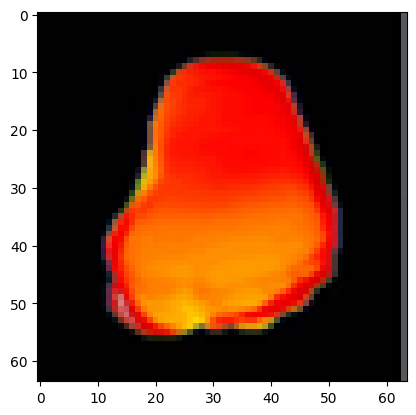

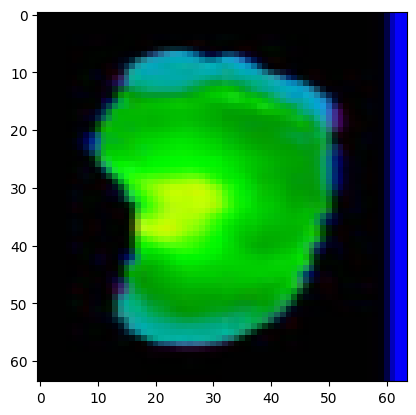

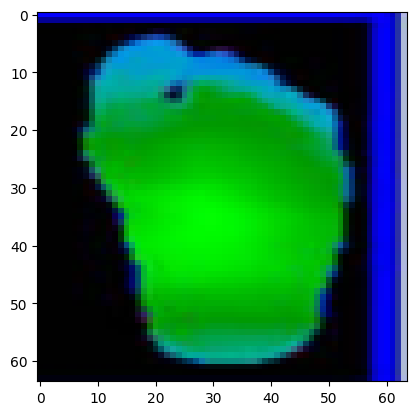

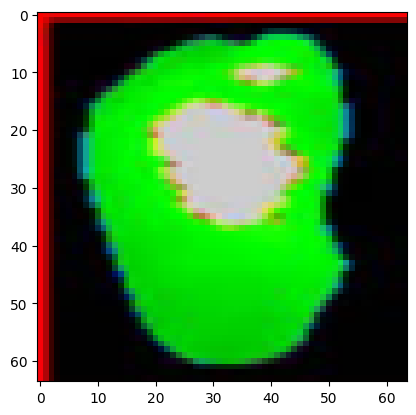

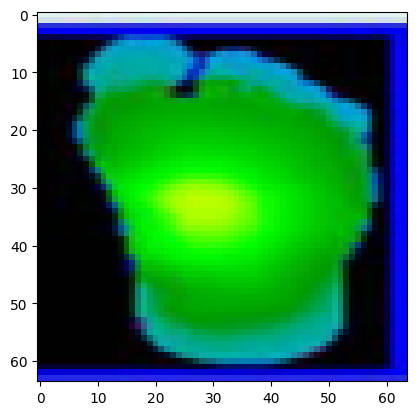

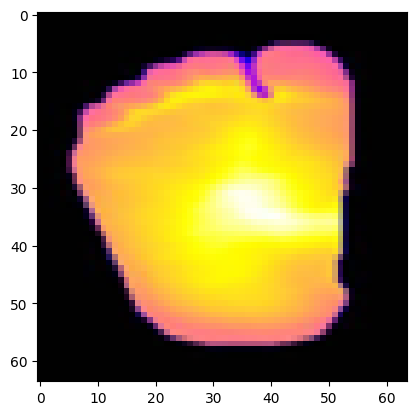

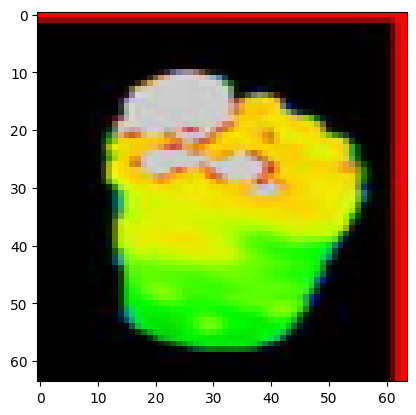

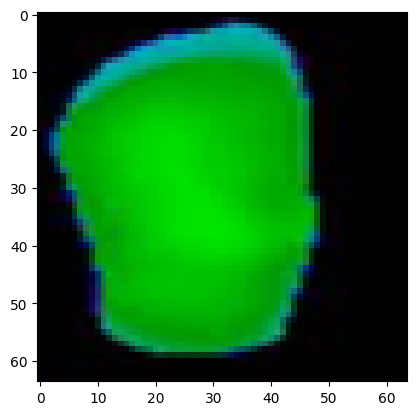

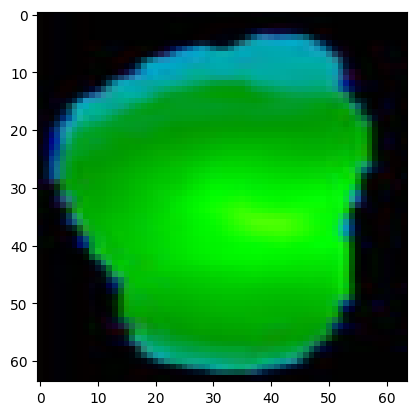

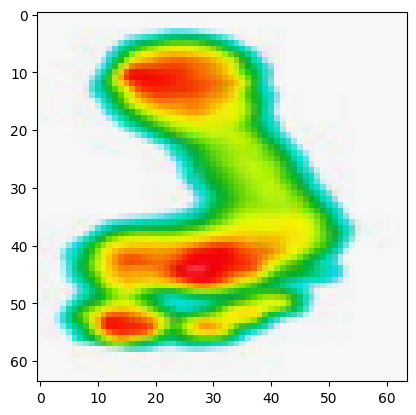

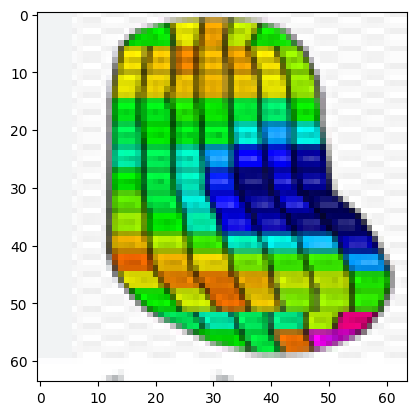

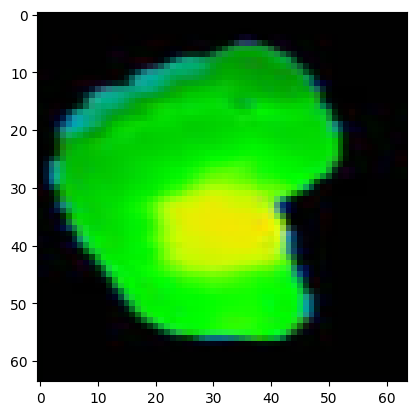

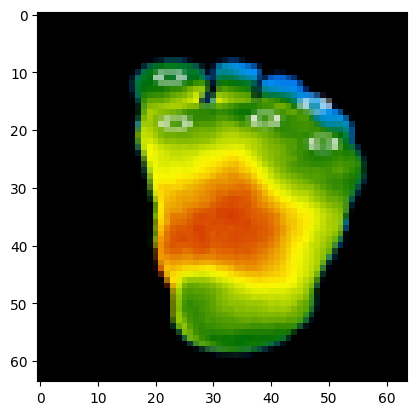

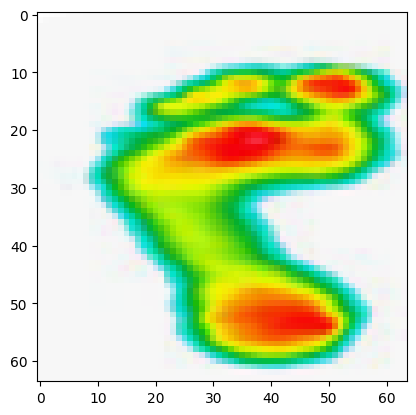

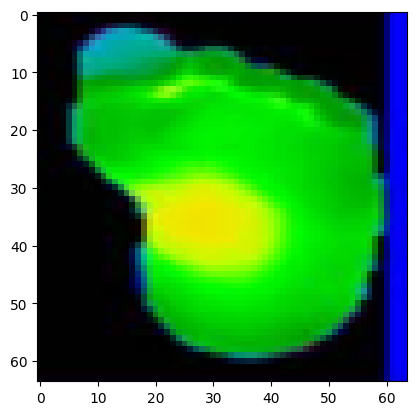

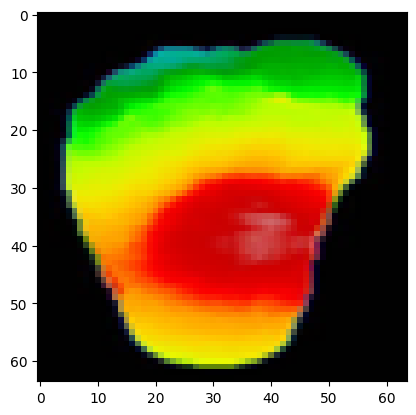

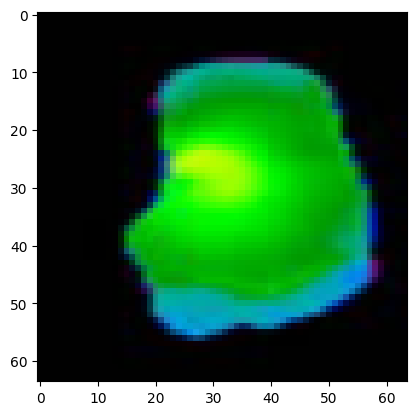

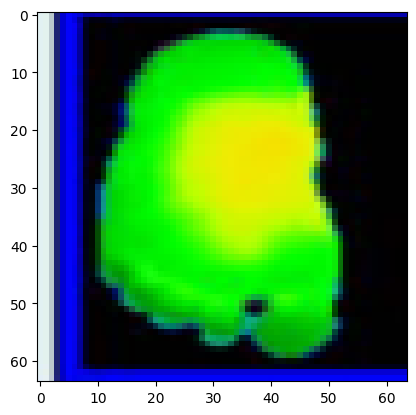

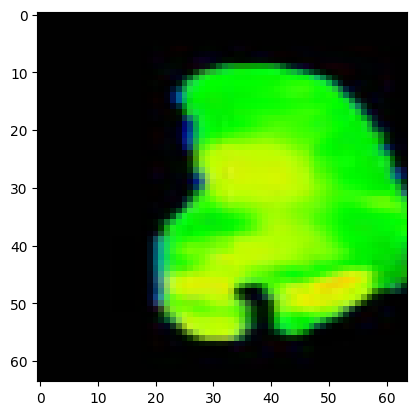

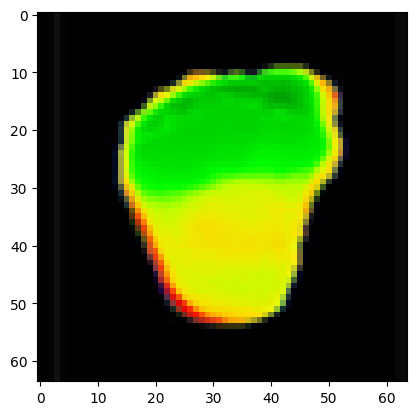

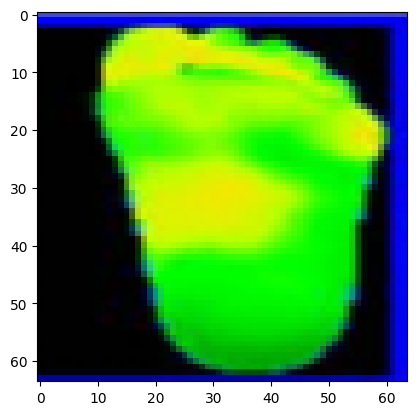

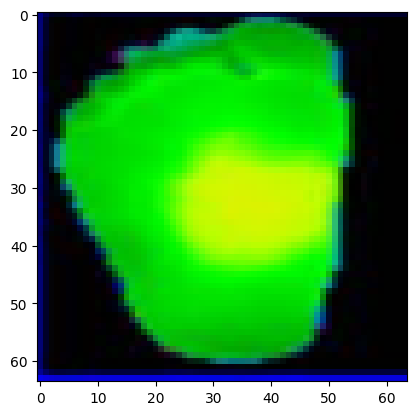

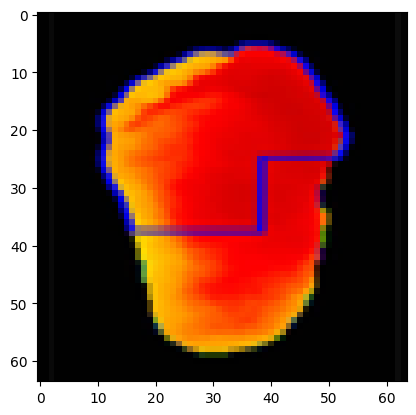

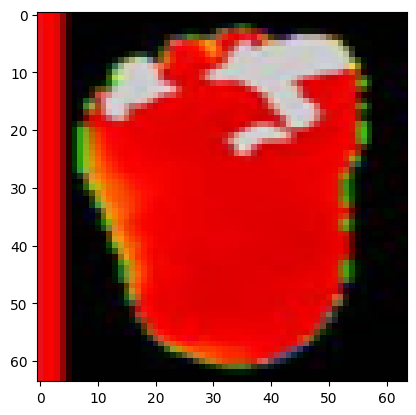

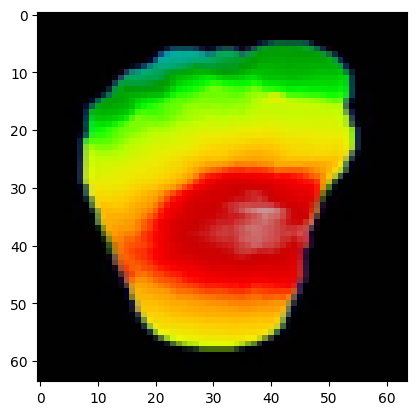

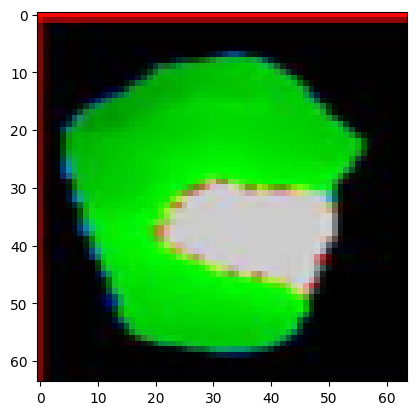

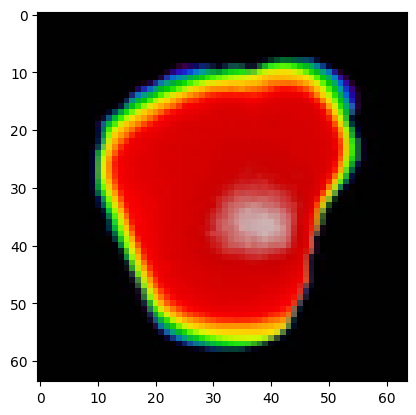

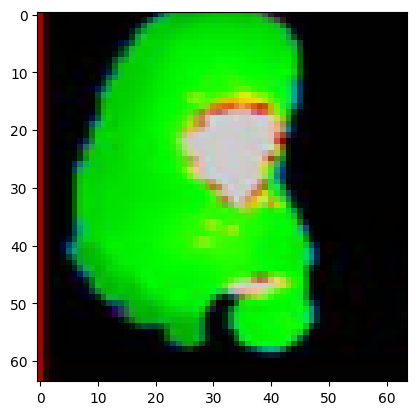

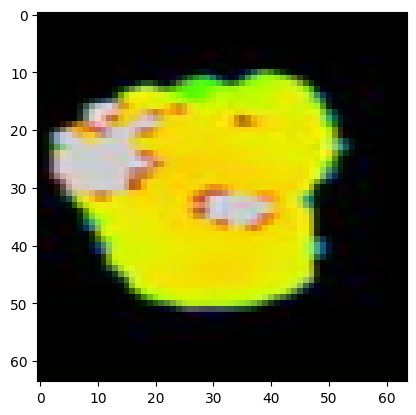

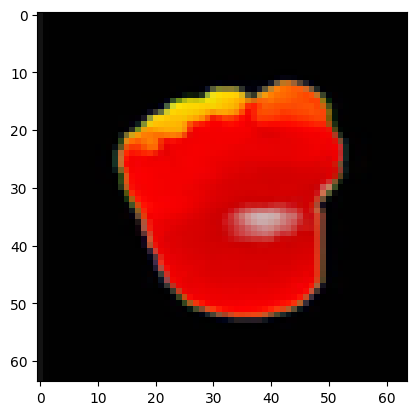

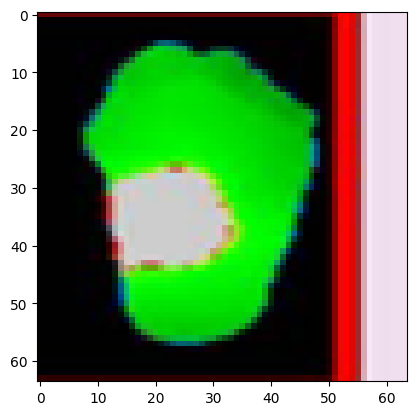

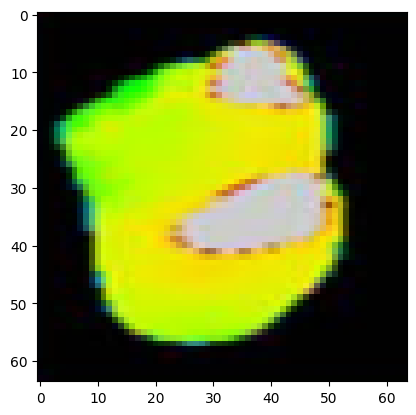

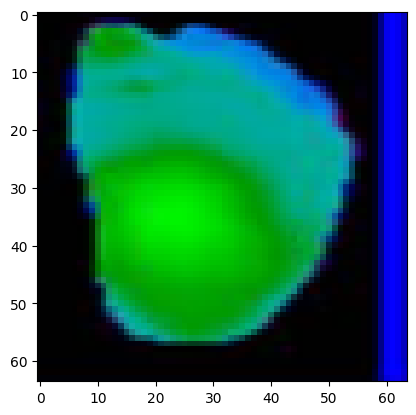

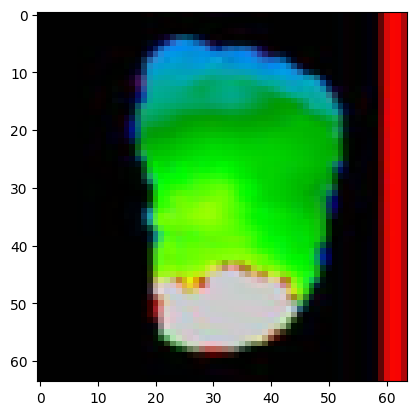

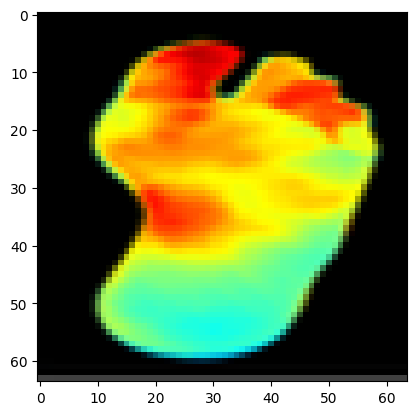

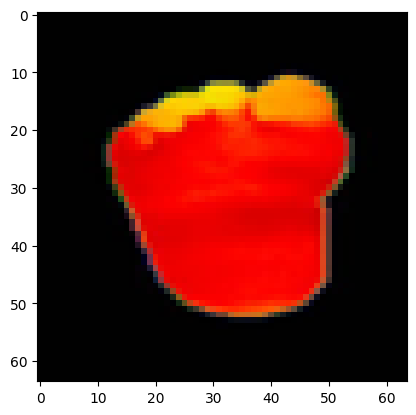

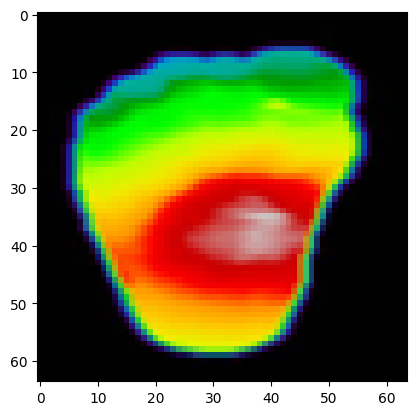

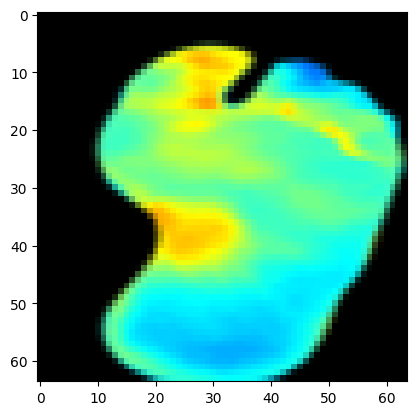

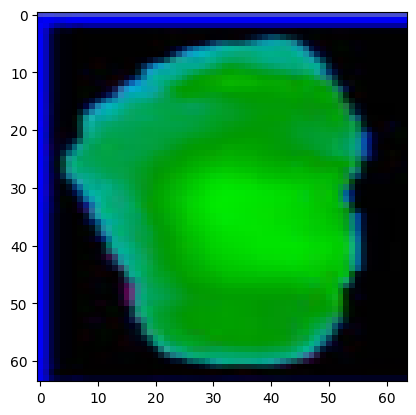

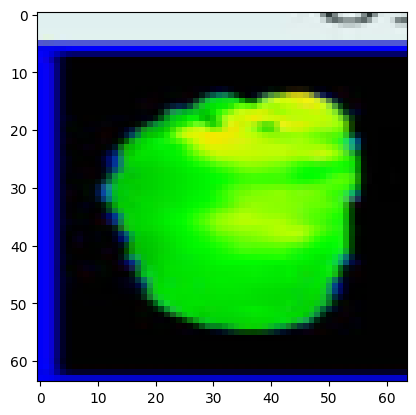

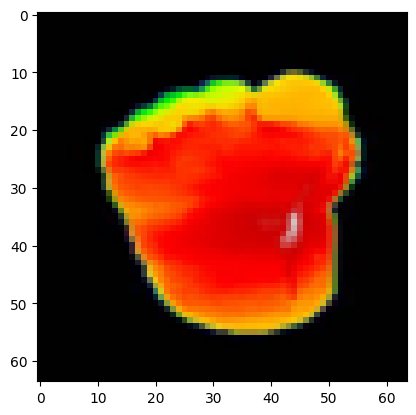

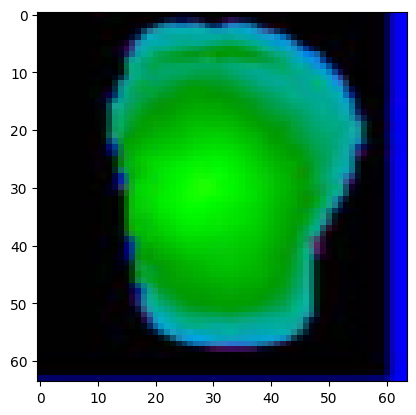

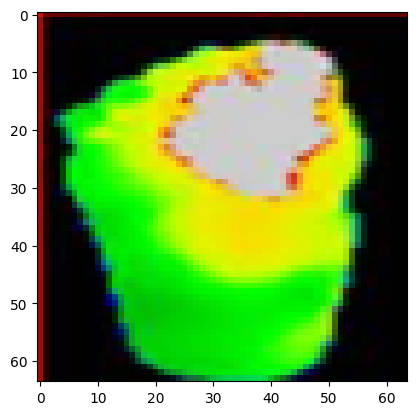

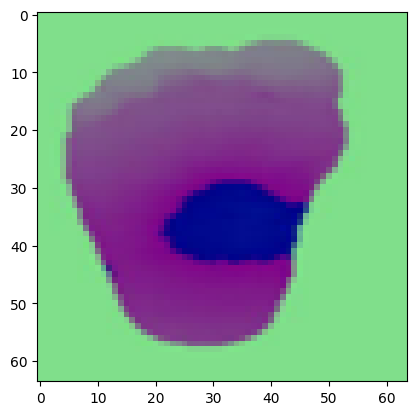

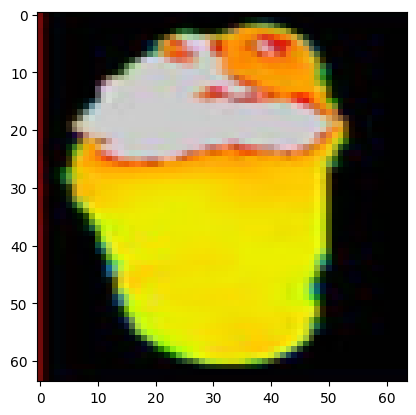

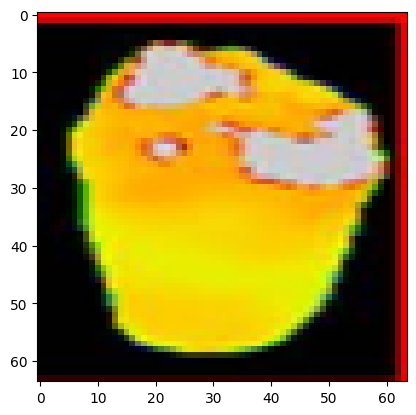

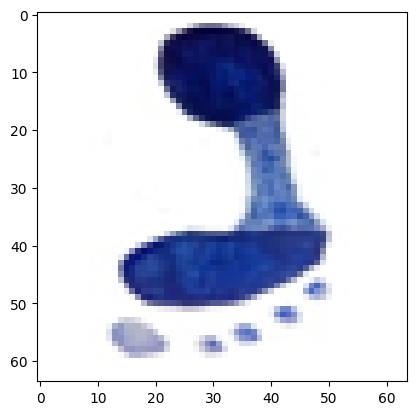

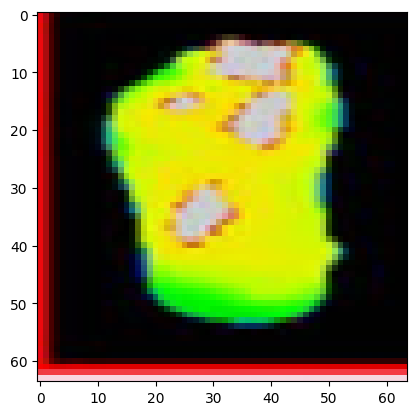

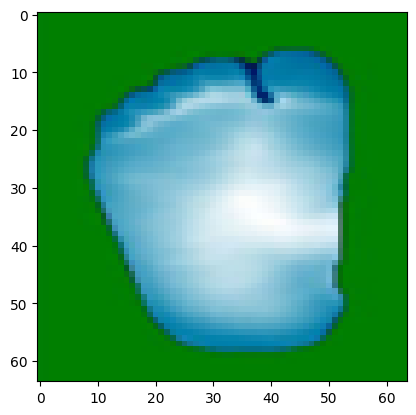

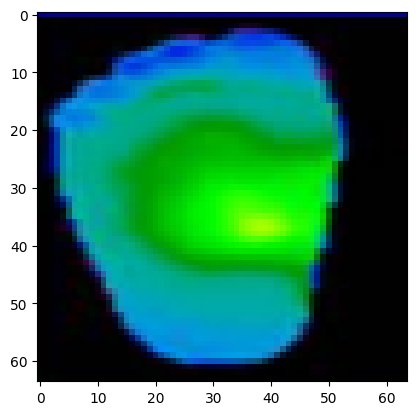

In [92]:
for i in xtest:
  first_image = i
  plt.imshow(first_image)
  plt.show()

In [88]:
ytest[4]

array([1., 0.], dtype=float32)

In [89]:
xtest[4]

array([[[227, 243, 240],
        [227, 243, 240],
        [226, 242, 240],
        ...,
        [227, 243, 239],
        [227, 243, 239],
        [227, 243, 240]],

       [[210, 226, 232],
        [209, 226, 231],
        [207, 226, 229],
        ...,
        [209, 227, 228],
        [210, 228, 221],
        [209, 225, 223]],

       [[ 43,  46, 217],
        [ 41,  46, 215],
        [ 38,  48, 212],
        ...,
        [ 40,  46, 219],
        [ 43,  47, 214],
        [ 44,  45, 212]],

       ...,

       [[  2,   1,  47],
        [  2,   1,  47],
        [  2,   1,  47],
        ...,
        [  4,   2, 169],
        [  7,   5, 226],
        [  3,   4, 248]],

       [[  0,   1, 211],
        [  0,   1, 212],
        [  0,   1, 212],
        ...,
        [  1,   1, 243],
        [  1,   2, 247],
        [  1,   1, 243]],

       [[ 37,  40, 231],
        [ 37,  40, 231],
        [ 37,  40, 231],
        ...,
        [ 40,  38, 226],
        [ 39,  44, 225],
        [ 37,  44, 219]]

In [109]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset, np.array(label), test_size=0.2, random_state=102)
INPUT_SHAPE = (64, 64, 3)
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Dense layer 2 (output layer)
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Train the model
history = model.fit(np.array(xtrain), np.array(ytrain), batch_size=64, verbose=1, epochs=30,
                    validation_split=0.1, shuffle=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_21 (Ba  (None, 31, 31, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)       

Test Loss: 0.8202, Test Accuracy: 0.6800


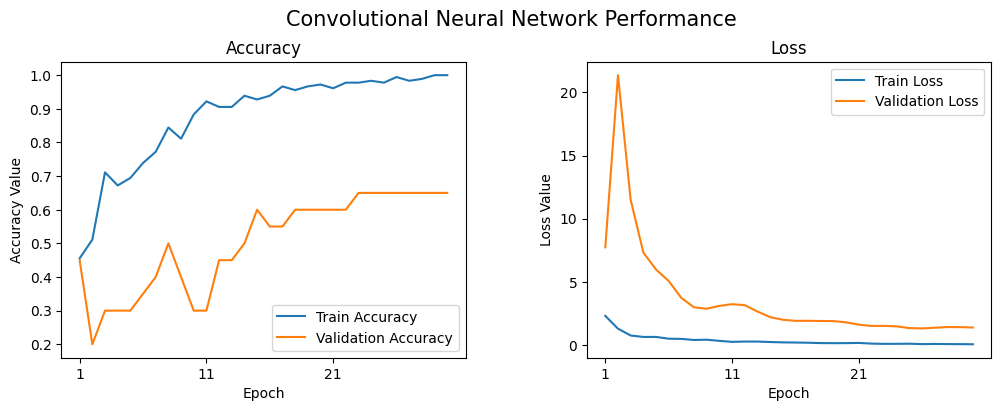

In [111]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle("Convolutional Neural Network Performance", fontsize=15)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history["accuracy"]) + 1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history["accuracy"], label="Train Accuracy")
ax1.plot(epoch_list, history.history["val_accuracy"], label="Validation Accuracy")
ax1.set_xticks(np.arange(1, max_epoch, 10))
ax1.set_ylabel("Accuracy Value")
ax1.set_xlabel("Epoch")
ax1.set_title("Accuracy")
l1 = ax1.legend(loc="best")
ax2.plot(epoch_list, history.history["loss"], label="Train Loss")
ax2.plot(epoch_list, history.history["val_loss"], label="Validation Loss")
ax2.set_xticks(np.arange(1, max_epoch, 10))
ax2.set_ylabel("Loss Value")
ax2.set_xlabel("Epoch")
ax2.set_title("Loss")
l2 = ax2.legend(loc="best")
test_loss, test_accuracy = model.evaluate(np.array(xtest), np.array(ytest), verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

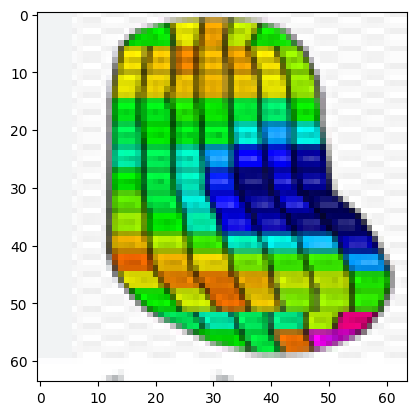

In [117]:
first_image = xtest[10]

plt.imshow(first_image)
plt.show()


In [114]:
ytest

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0])